## Convolução 1D

Antes de entrarmos no domínio das imagens, vamos entender a convolução em um contexto mais simples, trabalhando com sinais de apenas 1 dimensão.

Lembrando: A convolução é o somatório do produto entre funções, sendo uma delas **invertida e deslocada**. A Convolução **1D** indica que esta função será deslocada em apenas uma dimensão.
  
---

Vamos assumir o seguinte problema:<br>
Você decidiu coletar dados do acelerômetro de um celular. O objetivo é fazer com que pessoas caminhem com o celular no bolso para analisar como o sensor responde a esse movimento. Como demonstrado [nesse trabalho](https://www.researchgate.net/publication/221296054_Impact_of_different_walking_surfaces_on_gait_identification_based_on_higher-order_statistics_of_accelerometer_data/figures?lo=1), a magnitude no sinal do acelerômetro se altera como uma espécie de **senóide ruidosa**.


A seguir vamos simular um dado semelhante e supor que **queremos localizar os intervalos crescentes nesse sinal.**

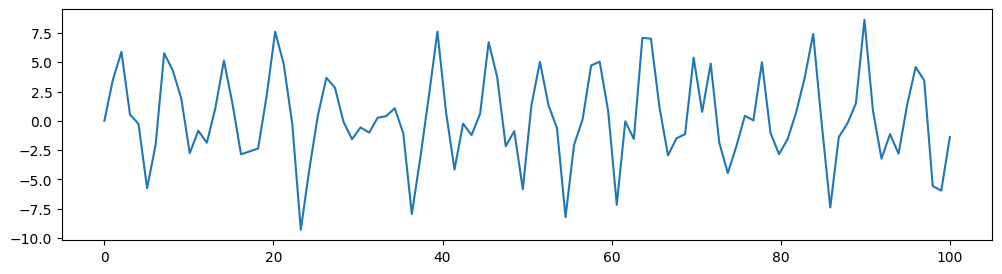

In [1]:
# Importa a interface de plotagem do Matplotlib para criar gráficos.
import matplotlib.pyplot as plt

# Importa o NumPy para operações numéricas e criação de arrays.
import numpy as np

# Importa a função de convolução da SciPy (não utilizada neste trecho específico).
from scipy.signal import convolve

# Cria um vetor de 100 pontos igualmente espaçados no intervalo [0, 100].
x = np.linspace(0, 100, 100)

# Gera uma série senoidal com amplitude 10 e aplica ruído multiplicativo uniforme em [0, 1).
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])

# Abre uma figura com tamanho 12×3 polegadas.
plt.figure(figsize=(12, 3))

# Plota a série 'sin' ao longo de 'x'. (Para exibir em alguns ambientes, pode ser necessário chamar plt.show()).
plt.plot(x, sin)
plt.show()

Pra facilitar, a célula a seguir apresenta uma função que usa o matplotlib para imprimir os sinais 1D como um vetor de valores.

In [2]:
# Define a função 'show' que recebe uma sequência 1D de valores e um título para visualização.
def show(valores, title,):

  # Cria uma figura cujo largura depende do número de valores (um "pixel" por valor) e altura fixa de 2 polegadas.
  plt.figure(figsize=(len(valores), 2))

  # Plota os valores como uma "imagem" de 1 linha (expandindo dimensão com np.newaxis), em tons de cinza.
  plt.imshow(valores[np.newaxis, :], cmap='gray')

  # Itera sobre os índices (k) e valores (s) para escrever o número por cima de cada "célula".
  for k, s in enumerate(valores):

    # Escreve o valor formatado com 1 casa decimal na posição (k, 0), centralizado, em vermelho e fonte 16.
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')

  # Define o título do gráfico com tamanho de fonte 18.
  plt.title(title, fontsize=18)

  # Remove as marcações do eixo Y (fica uma faixa única sem ticks).
  plt.yticks([])


### Representação 1D

Utilizaremos um pequeno trecho do sinal para ilustrar o efeito da convolução.

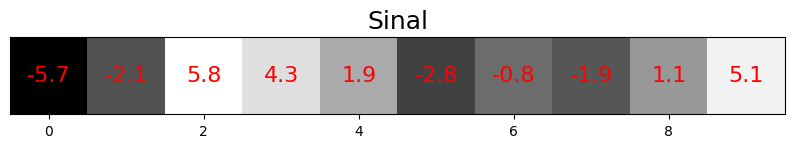

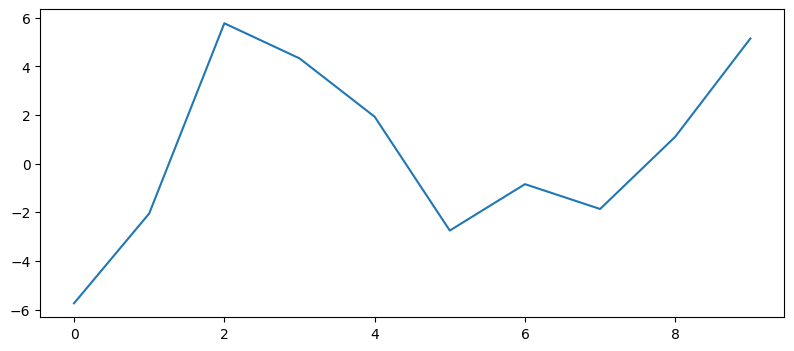

In [3]:
# Recorta uma janela do sinal 'sin' dos índices 5 a 14 (10 amostras).
sinal = sin[5:15]

# Visualiza a janela como “faixa” com os valores anotados.
show(sinal, 'Sinal')

# Abre uma figura 9.6×4 para traçar a série temporal.
plt.figure(figsize=(9.6, 4))

# Plota a sequência 1D 'sinal' como linha.
plt.plot(sinal)
plt.show()

### Kernel

No contexto de processamento de imagens, o kernel é um **filtro convolucional**. De forma prática, é uma matriz n-dimensional que será operada com o dado através de uma convolução.

Pode-se dizer que a convolução **mede a semelhança** entre os dois sinais.

Precisamos portanto propor um kernel que simule o padrão procurado: intervalos crescentes. 
> Mas lembre-se que a convolução opera as funções após **inverter o kernel**.

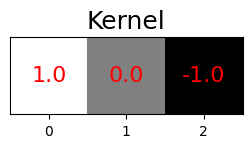

In [4]:
# Define um kernel 1D simples (derivada discreta) para realçar transições: [1, 0, -1].
kernel = np.asarray([1,0,-1])

# Exibe o kernel como uma faixa, com valores anotados.
show(kernel, 'Kernel')


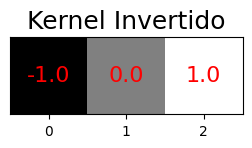

In [5]:
# Inverte a ordem dos elementos do kernel (necessário para a operação de convolução clássica).
kernel_invertido = np.flip(kernel)

# Exibe o kernel invertido para inspeção visual.
show(kernel_invertido, 'Kernel Invertido')


Na célula a seguir vamos imprimir o kernel **deslocando-o ao longo do sinal** para entender passo a passo da operação.

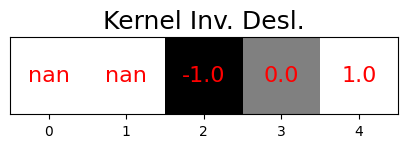

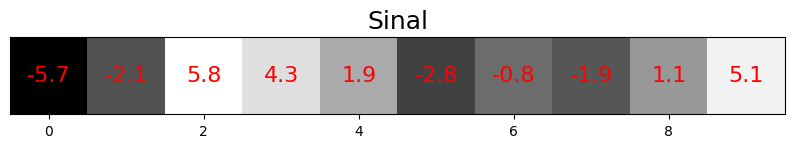

In [6]:
# Fecha todas as figuras abertas para limpar a área de plot.
plt.close('all')

# Define o deslocamento u (em amostras) para “empurrar” o kernel para a direita.
u = 2

# Cria u valores NaN para servirem de preenchimento/offset visual.
deslocamento = [float('nan')] * u

# Concatena o deslocamento antes do kernel invertido para representar o kernel deslocado.
kernel_deslocado = np.hstack((deslocamento, kernel_invertido))

# Exibe o kernel deslocado (NaNs à esquerda indicam o offset).
show(kernel_deslocado, 'Kernel Inv. Desl.')

# Exibe também o sinal original para comparação visual.
show(sinal, 'Sinal')


Agora vamos comparar os nossos cálculos com o resultado da função ```convolve``` da biblioteca ```scipy```

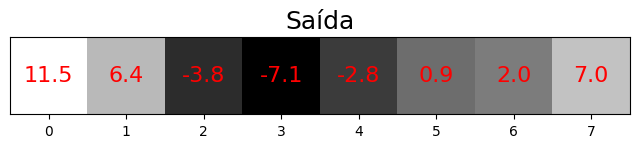

In [7]:
# Aplica convolução 1D do sinal com o kernel; em 'valid', só posições com sobreposição total (tamanho = len(sinal) - len(kernel) + 1).
out = convolve(sinal, kernel, mode='valid')

# Exibe a saída da convolução como faixa anotada.
show(out, 'Saída')


Pra ficar mais visual, vamos imprimir a função resultante sobreposta ao sinal original, de modo a entender melhor como essa função nos ajuda a identificar os intervalos crescentes do sinal original.

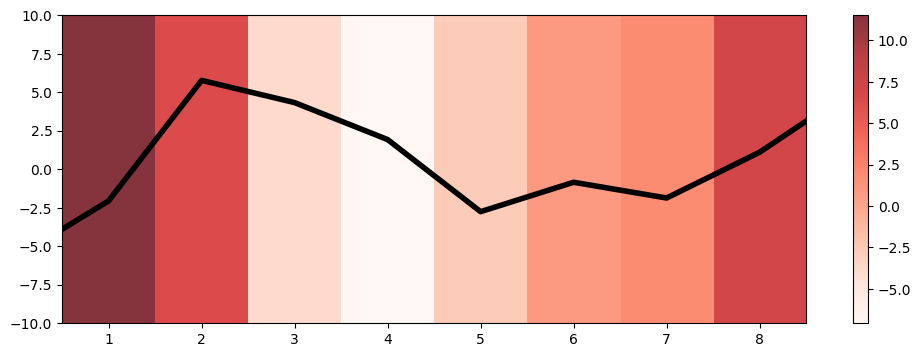

In [8]:
# Cria uma nova figura com largura 12 e altura 4 polegadas para compor o gráfico.
plt.figure(figsize=(12, 4))

# Traça a série temporal 'sinal' em preto ('k') com espessura de linha 4, servindo como base.
plt.plot(sinal, color='k', linewidth=4)

# Sobrepõe a saída da convolução como um “heatmap” 1×N:
# - out[np.newaxis, :] cria uma linha (dimensão extra) para o imshow.
# - cmap='Reds' usa mapa de cores vermelho.
# - aspect='auto' permite esticar no eixo x.
# - alpha=0.8 deixa parcialmente transparente para ver a linha abaixo.
# - extent mapeia o eixo x de 0.5 a 8.5 (len(out)=8) e o eixo y de -10 a 10 para cobrir a faixa do sinal.
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))

# Adiciona a barra de cores para indicar a intensidade dos valores do heatmap.
plt.colorbar()
plt.show()

E se rodarmos no restante do sinal como uma espécie de classificação?<br>
Neste contexto específico, podemos considerar que **ativações menores que zero** indicam que não há tendência crescente naquele intervalo do sinal.

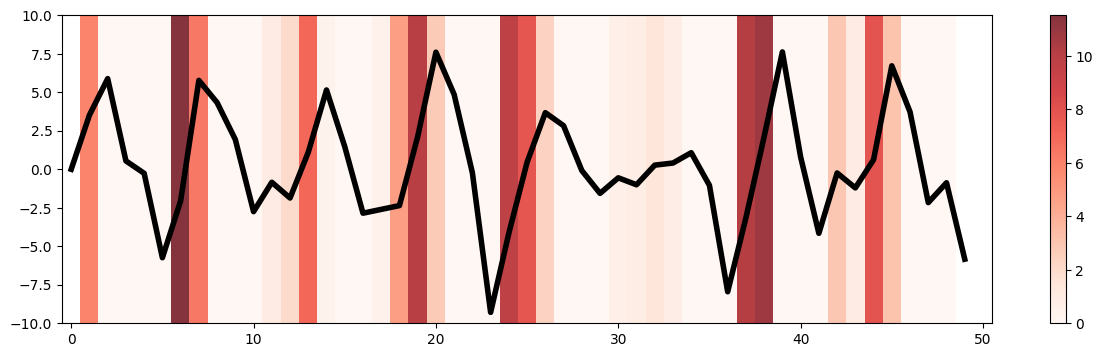

In [9]:
# Convoluciona as primeiras 50 amostras do sinal com o kernel; em 'valid', o tamanho sai como 50 - 3 + 1 = 48.
out = convolve(sin[:50], kernel, mode='valid')

# Zera os valores negativos da saída (efeito “ReLU”), mantendo apenas respostas positivas do filtro.
out[out < 0] = 0

# Abre uma figura larga para visualizar a série e o heatmap da resposta do filtro.
plt.figure(figsize=(15, 4))

# Plota o trecho do sinal original (50 pontos) como referência, em preto e linha espessa.
plt.plot(sin[:50], color='k', linewidth=4)

# Exibe a saída da convolução como um “heatmap” 1×N:
# - np.newaxis cria dimensão de linha para o imshow;
# - 'Reds' destaca intensidades altas;
# - aspect='auto' estica no eixo x;
# - alpha=0.8 torna translúcido sobre a curva;
# - extent=(0.5, 48.5, -10, 10) alinha os 48 valores às posições centrais (índices 1..48) no eixo x.
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))

# Ajusta os limites do eixo x para mostrar ligeira margem além dos dados (0..49).
plt.xlim(-0.5, 50.5)

# Adiciona barra de cores indicando a intensidade do heatmap.
plt.colorbar()
plt.show()